In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
from math import sqrt
import imageio
import numpy as np
# from skimage.draw import circle, circle_perimeter,circle_perimeter_aa
from skimage import data, img_as_float
from skimage.feature import blob_log,peak_local_max
from skimage.color import rgb2gray, label2rgb
from skimage.measure import label, regionprops,find_contours
from skimage.filters import gaussian, threshold_otsu, threshold_multiotsu, difference_of_gaussians
from skimage.segmentation import active_contour, watershed
from scipy import ndimage as ndi


(-0.5, 499.5, 499.5, -0.5)

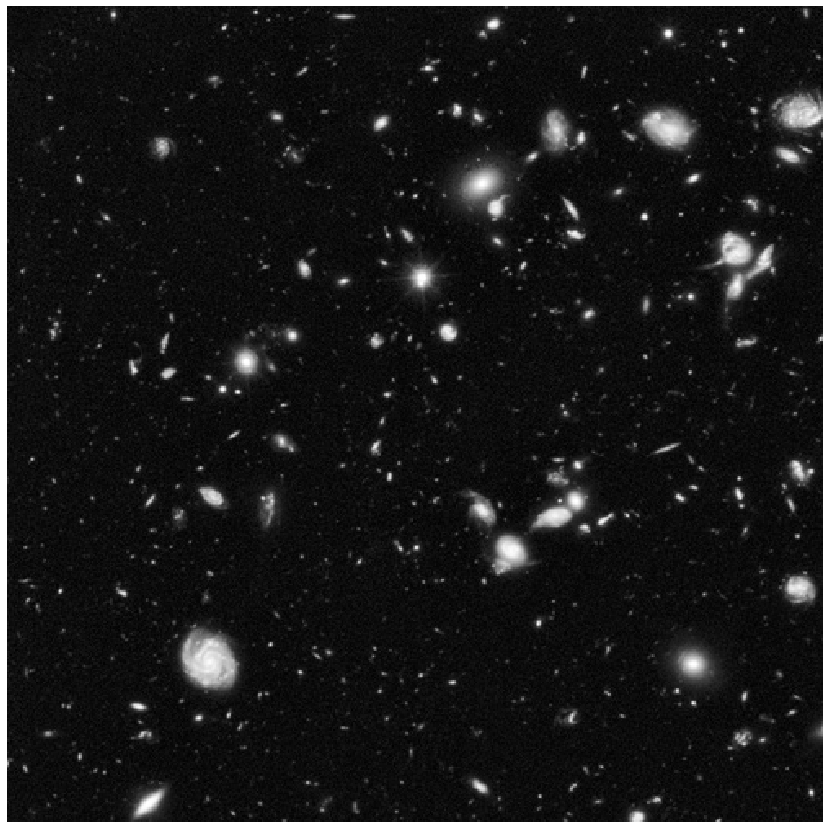

In [9]:
#############
# IMAGE
#############
img_stars = data.hubble_deep_field()[0:500, 0:500]
stars_gray = rgb2gray(img_stars)
rows_img = stars_gray.shape[0]
columns_img = stars_gray.shape[1]

plt.imshow(stars_gray, cmap=plt.cm.gray)
plt.axis('off')

Blob Detection. LoG

Number of blobs counted :  542
c type<class 'matplotlib.patches.Circle'>, c Circle(xy=(131, 46), radius=3.41421)


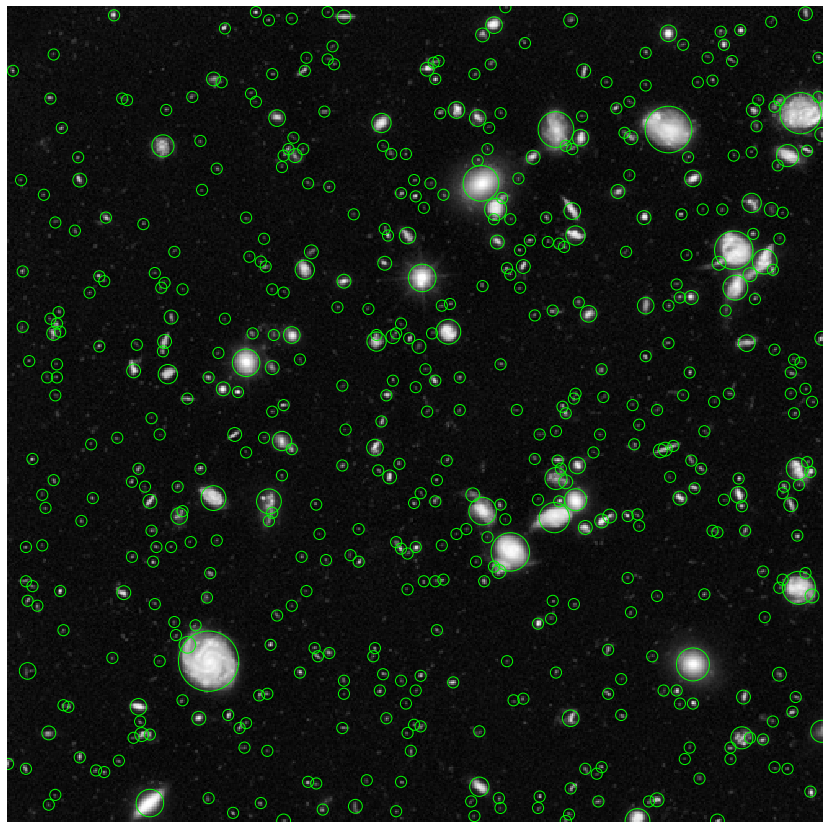

In [10]:
blobs_log = blob_log(stars_gray, min_sigma = 1, max_sigma=30, num_sigma=50, threshold=.1)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
numrows = len(blobs_log)
print("Number of blobs counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
#plt.imshow(stars_gray, cmap = plt.cm.gray)
ax.imshow(stars_gray, cmap = plt.cm.gray)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r+2, color='lime', linewidth=1, fill=False)
    ax.add_patch(c)
plt.axis('off')
print('c type{}, c {}'. format(type(c),c))

Labeling Regions

Number of regions counted :  454


(-0.5, 525.025, 525.025, -0.5)

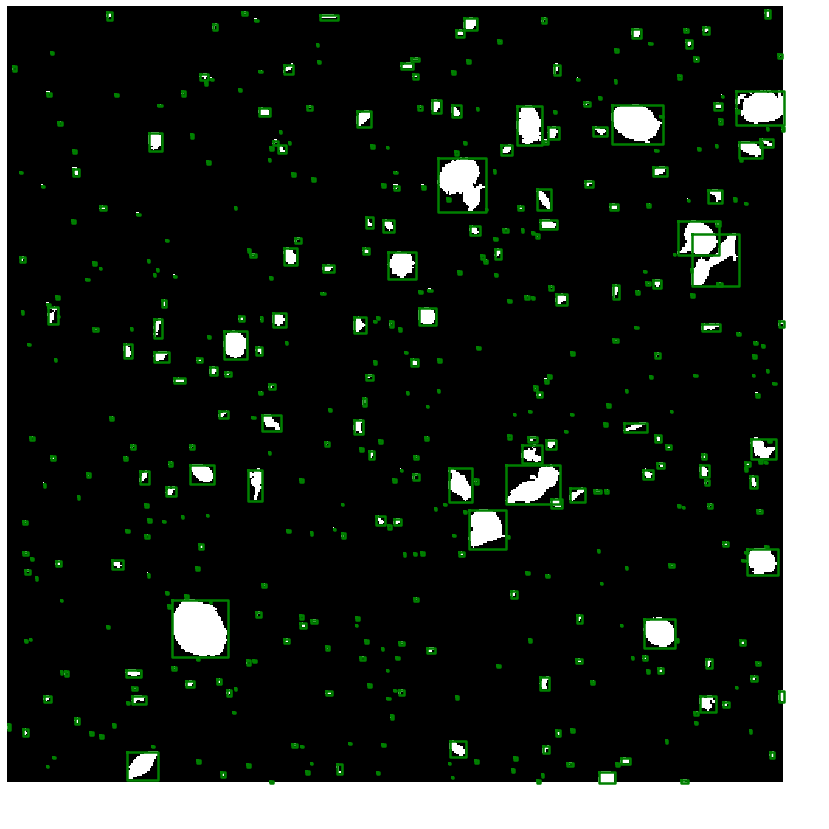

In [11]:
stars_gauss = gaussian(stars_gray)
#thresh = threshold_otsu(stars_gauss)
#stars_thresh = stars_gauss > thresh

thresholds = threshold_multiotsu(stars_gauss, classes=2)
stars_thresh = np.digitize(stars_gray, bins=thresholds)

label_img = label(stars_thresh)
regions = regionprops(label_img)
numregions = len(regions)
print("Number of regions counted : " ,numregions)

fig_label, ax_label = plt.subplots(1,1)
plt.imshow(stars_thresh, cmap = plt.cm.gray)

for props in regions:
    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax_label.plot(bx, by, '-g', linewidth=2.5)
plt.axis('off')

Watershed segmentation

Number of basins counted :  576


(-0.5, 499.5, 499.5, -0.5)

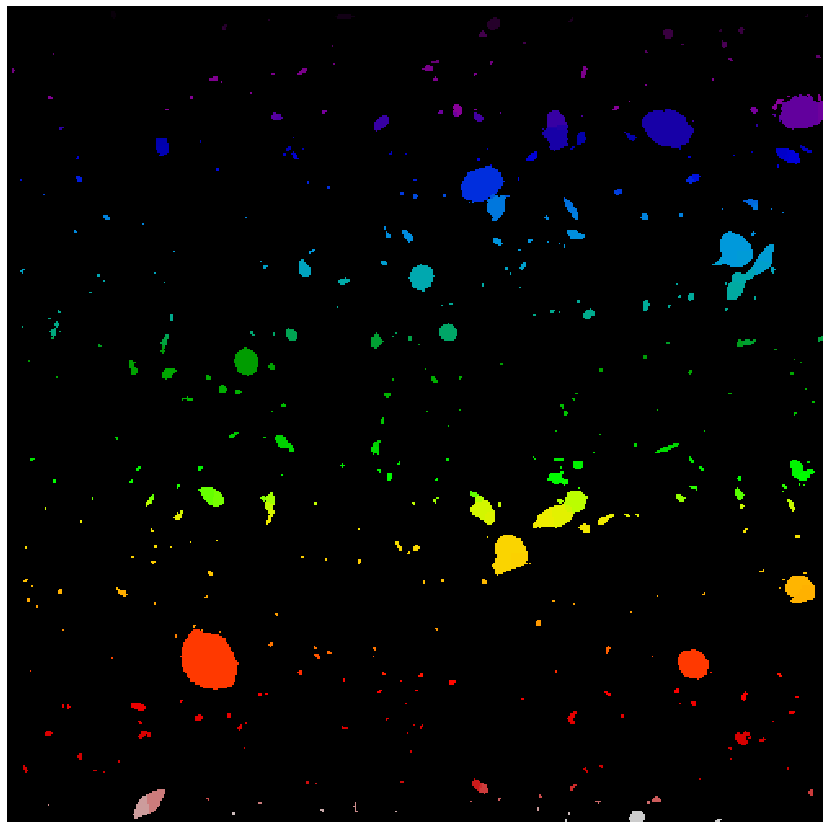

In [12]:
# stars_gauss = gaussian(stars_gray)
stars_thresh = threshold_otsu(stars_gray)
#stars_binary = (stars_gauss > stars_thresh)
stars_binary = (stars_gray > stars_thresh)
distance = ndi.distance_transform_edt(stars_binary)
local_maxi = peak_local_max(distance, indices=False, labels=stars_binary)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=stars_binary)

props = regionprops(labels)
num_basins = len(props)
print("Number of basins counted : " ,num_basins)

plt.imshow(labels, cmap=plt.cm.nipy_spectral)
plt.axis('off')

Contours

Number of contours counted :  389


(-0.5, 499.5, 499.5, -0.5)

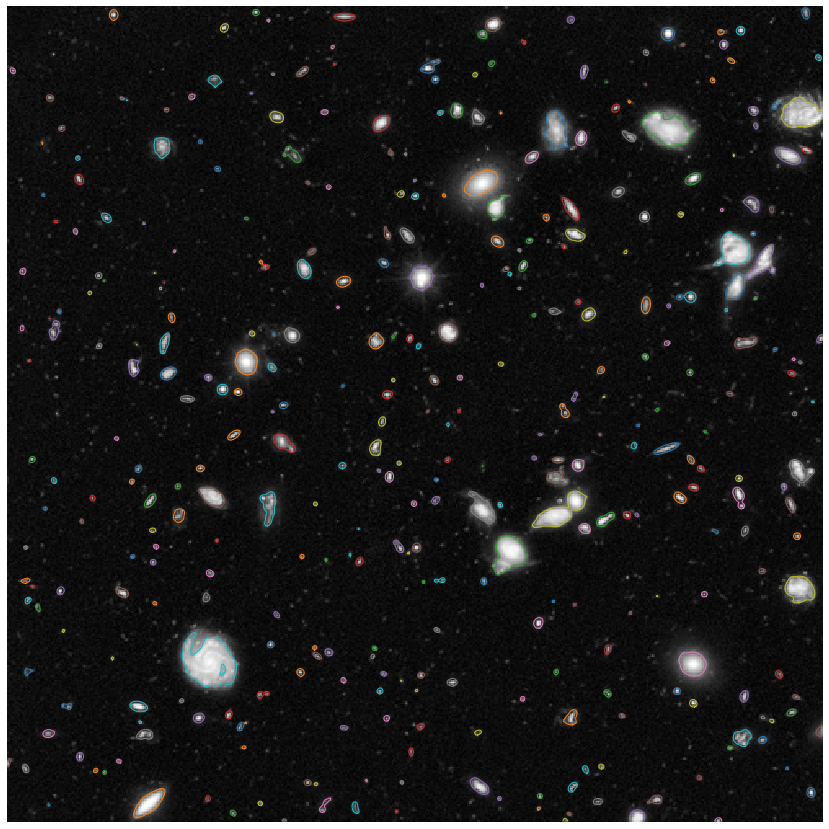

In [13]:
stars_filtered = difference_of_gaussians(stars_gray, low_sigma = 1, high_sigma=7)
#print("mean values : " ,stars_gray.mean())
#find contour
contours = find_contours(stars_filtered, level = 0.1)

# Display the image and plot all contours found
fig_c, ax_c = plt.subplots()
ax_c.imshow(stars_gray, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax_c.plot(contour[:, 1], contour[:, 0], linewidth=1)
print("Number of contours counted : " ,len(contours))
ax_c.axis('image')
# ax_c.set_xticks([])
# ax_c.set_yticks([])
plt.axis('off')
